In [6]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import os
from sklearn.utils import shuffle            #shuffle and randomize the data
import matplotlib.pyplot as plt              #visualization
import cv2                                   #computervision tasks, resize, images reading and pixel manipulation
from sklearn.metrics import confusion_matrix  #Validation matric
import seaborn as sn; sn.set(font_scale=1.4) #visualization and scale set to view proper fonts and add to paper                     #predictions and modeling            
from tqdm import tqdm                # To visualize our loops and progress
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounting google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd drive/My Drive/Colab Notebooks/Images/

/content/drive/My Drive/Colab Notebooks/Images


In [4]:
train_test_directories = ["seg_train","seg_test"]

In [7]:
class_labels = {name:index for index, name in enumerate(os.listdir(train_test_directories[0]))}

In [8]:
class_labels

{'buildings': 3,
 'forest': 4,
 'glacier': 0,
 'mountain': 1,
 'sea': 5,
 'street': 2}

In [10]:
#function for preapring dataset

def prepare_datatset():
    
    resulted_pairs =  []
    
    #first iterate the directories which contain training and testing images
    for directory in train_test_directories:
        #go to each type of image and read images
        
        imagesOfOneType = []
        labelsOfOneType = []
        
        for image_type in (os.listdir(directory)):
            #extract label from created dictionary
            image_label = class_labels[image_type]
            
            #Reading each file and resize it , As some of the images are not consistant in size
            for image in os.listdir(os.path.join(directory,image_type)):  #using tqtm for showing the progress bar
                
                img = cv2.imread(os.path.join(os.path.join(directory,image_type),image))
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #reading with color not the greyscale only
                img = cv2.resize(img,(150,150))   #setting up the size of image as 150 * 150 
                
                #writing the image to list imagesOfOneType and respective label to list labelsOfOneType
                
                imagesOfOneType.append(img)
                labelsOfOneType.append(image_label)
                
        imagesOfOneType = np.array(imagesOfOneType, dtype= 'float32')  # setting up float type for RGB, though we have 0-255range
        labelsOfOneType = np.array(labelsOfOneType, dtype='int32')
        
        resulted_pairs.append((imagesOfOneType,labelsOfOneType)) # appending the tupple into resulted output
    
    return resulted_pairs


In [11]:
(training_images, training_labels), (testing_images, testing_labels) = prepare_datatset()

100%|██████████| 510/510 [03:55<00:00,  2.17it/s]


In [59]:
training_images = training_images / 255.0
testing_images = testing_images / 255.0

In [60]:
def show_random_images(image_type, images, labels):
    
    fig = plt.figure(figsize=(10,10))
    
    fig.suptitle("Training Examples", fontsize=14)
    
    for j in range(10):
        plt.subplot(5,5,j+1)
        plt.grid(False)
        plt.imshow(images[j], cmap=plt.cm.binary)
    plt.show()

In [63]:
training_images.shape

(14044, 150, 150, 3)

**Convolutional Neural Network**

2 Conv layers, 2 max , flatten and two dense layers

In [10]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6,activation=tf.nn.softmax)
])

In [11]:
cnn_model.compile(optimizer='adam',loss ='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 7

In [13]:
cnn_history = cnn_model.fit(training_images, training_labels, batch_size=128,epochs=20,validation_split=0.2)

Epoch 1/20
88/88 [==============================] - 12s 138ms/step - loss: 55.7173 - accuracy: 0.3989 - val_loss: 5.0241 - val_accuracy: 0.1335
Epoch 2/20
88/88 [==============================] - 11s 122ms/step - loss: 0.8900 - accuracy: 0.6769 - val_loss: 6.9945 - val_accuracy: 0.1385
Epoch 3/20
88/88 [==============================] - 11s 122ms/step - loss: 0.4822 - accuracy: 0.8315 - val_loss: 9.1461 - val_accuracy: 0.1289
Epoch 4/20
88/88 [==============================] - 11s 121ms/step - loss: 0.2315 - accuracy: 0.9253 - val_loss: 14.5238 - val_accuracy: 0.1481
Epoch 5/20
88/88 [==============================] - 11s 121ms/step - loss: 0.1207 - accuracy: 0.9668 - val_loss: 19.3289 - val_accuracy: 0.1396
Epoch 6/20
88/88 [==============================] - 11s 121ms/step - loss: 0.0733 - accuracy: 0.9826 - val_loss: 21.9213 - val_accuracy: 0.1627
Epoch 7/20
88/88 [==============================] - 11s 122ms/step - loss: 0.0667 - accuracy: 0.9870 - val_loss: 20.5002 - val_accuracy: 0

In [16]:
import pickle
with open('/cnn_modelHistoryDict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [17]:
from keras.models import load_model
import h5py
from keras.callbacks import History 
#import keras

cnn_model.save('cnn_model.h5')  # creates a HDF5 file 'my_model.h5'

Using TensorFlow backend.


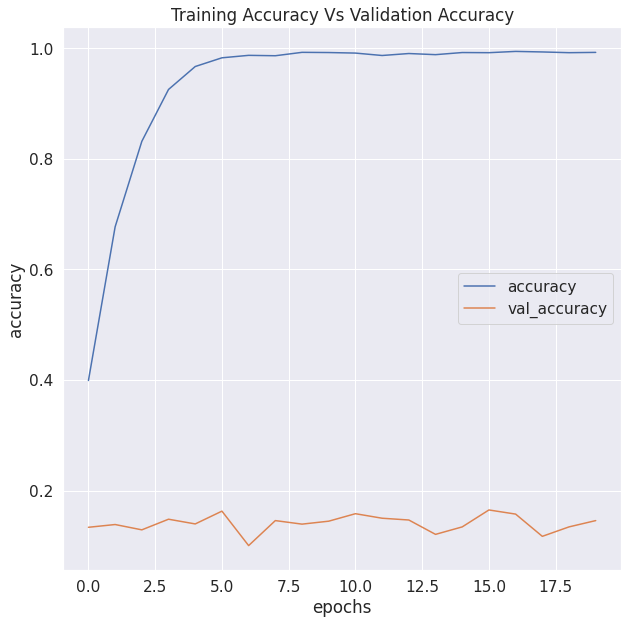

In [24]:
# Plot accuracy vs validation accuracy
fig = plt.figure(figsize=(10,10))
#plt.subplot(221)
plt.plot(cnn_model.history.history['accuracy'], label = "accuracy")
plt.plot(cnn_model.history.history['val_accuracy'], label = "val_accuracy")
plt.title("Training Accuracy Vs Validation Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()
plt.savefig("TrainAccVsValAcc.pdf")

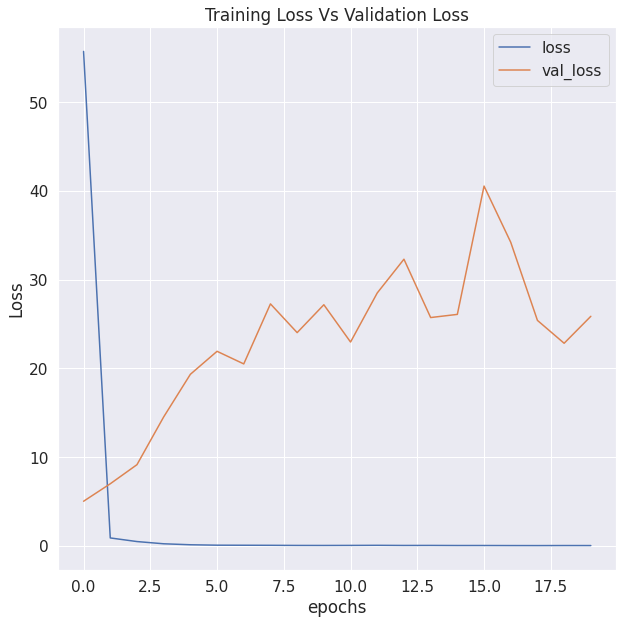

In [25]:
# Plot Loss vs validation loss
fig = plt.figure(figsize=(10,10))
#plt.subplot(221)
plt.plot(cnn_model.history.history['loss'], label = "loss")
plt.plot(cnn_model.history.history['val_loss'], label = "val_loss")
plt.title("Training Loss Vs Validation Loss")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend()
plt.savefig("TrainLossVsValLoss.pdf")

In [27]:
cnn_variant = Models.Sequential()

cnn_variant.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
cnn_variant.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
cnn_variant.add(Layers.MaxPool2D(5,5))
cnn_variant.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
cnn_variant.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
cnn_variant.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
cnn_variant.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
cnn_variant.add(Layers.MaxPool2D(5,5))
cnn_variant.add(Layers.Flatten())
cnn_variant.add(Layers.Dense(180,activation='relu'))
cnn_variant.add(Layers.Dense(100,activation='relu'))
cnn_variant.add(Layers.Dense(50,activation='relu'))
cnn_variant.add(Layers.Dropout(rate=0.5))
cnn_variant.add(Layers.Dense(6,activation='softmax'))

In [28]:
cnn_variant.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
cnn_variant.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 50)       

In [30]:
cnn_variant_history = cnn_variant.fit(training_images,training_labels,epochs=20,validation_split=0.30)

Epoch 1/20
308/308 [==============================] - 199s 646ms/step - loss: 1.3703 - accuracy: 0.4776 - val_loss: 2.8439 - val_accuracy: 0.1735
Epoch 2/20
308/308 [==============================] - 195s 632ms/step - loss: 0.9680 - accuracy: 0.6304 - val_loss: 3.4697 - val_accuracy: 0.1804
Epoch 3/20
308/308 [==============================] - 195s 632ms/step - loss: 0.8148 - accuracy: 0.7010 - val_loss: 3.3326 - val_accuracy: 0.3178
Epoch 4/20
308/308 [==============================] - 195s 632ms/step - loss: 0.7245 - accuracy: 0.7399 - val_loss: 2.9621 - val_accuracy: 0.3806
Epoch 5/20
308/308 [==============================] - 195s 632ms/step - loss: 0.6648 - accuracy: 0.7680 - val_loss: 4.1735 - val_accuracy: 0.2335
Epoch 6/20
308/308 [==============================] - 195s 632ms/step - loss: 0.5946 - accuracy: 0.7900 - val_loss: 3.5117 - val_accuracy: 0.3723
Epoch 7/20
308/308 [==============================] - 195s 632ms/step - loss: 0.5745 - accuracy: 0.7980 - val_loss: 3.4556 -

**Testing With CNN Base Model**

In [35]:
base_model_loss = cnn_model.evaluate(testing_images, testing_labels)

94/94 [==============================] - 2s 16ms/step - loss: 7.2470 - accuracy: 0.5407


In [33]:
base_model_predictions = cnn_model.predict(testing_images)
base_model_predicted_labels = np.argmax(base_model_predictions, axis = 1)

**Testing with Updated Variant of CNN**

In [36]:
variant_model_loss = cnn_variant.evaluate(testing_images, testing_labels)

94/94 [==============================] - 18s 191ms/step - loss: 2.3350 - accuracy: 0.7047


In [46]:
variant_model_predictions = cnn_variant.predict(testing_images)
variant_model_predicted_labels = np.argmax(variant_model_predictions, axis = 1)

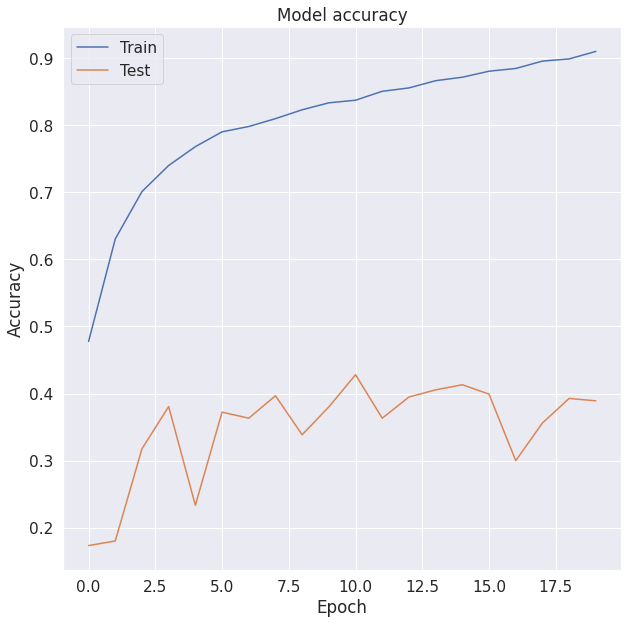

<Figure size 432x288 with 0 Axes>

In [41]:
fig = plt.figure(figsize=(10,10))
plt.plot(cnn_variant_history.history['accuracy'])
plt.plot(cnn_variant_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.savefig("TrainLossVsValLossVariant.pdf")

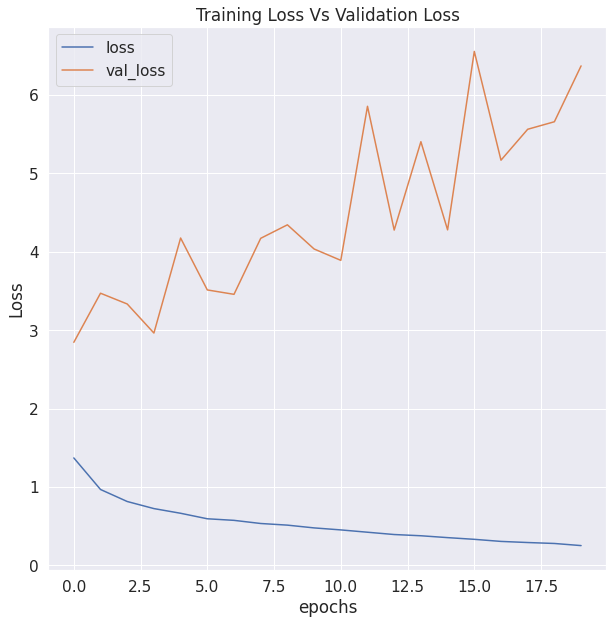

In [44]:
# Plot Loss vs validation loss
fig = plt.figure(figsize=(10,10))
#plt.subplot(221)
plt.plot(cnn_variant_history.history['loss'], label = "loss")
plt.plot(cnn_variant_history.history['val_loss'], label = "val_loss")
plt.title("Training Loss Vs Validation Loss")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend()
plt.savefig("TrainLossVsValLossVariant.pdf")

**Confusion Matrix For Base Model**

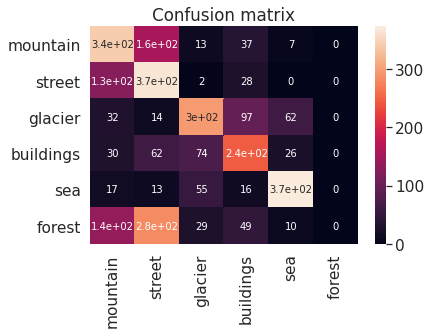

<Figure size 720x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [50]:
CM = confusion_matrix(testing_labels, base_model_predicted_labels)
ax = plt.axes()
fig = plt.figure(figsize=(10,10))
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels= ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest'], 
           yticklabels= ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest'], ax = ax)
ax.set_title('Confusion matrix')
plt.show()
plt.savefig("ConfusionMatrixForBase")

**Confusion Matrix For Variant Model**

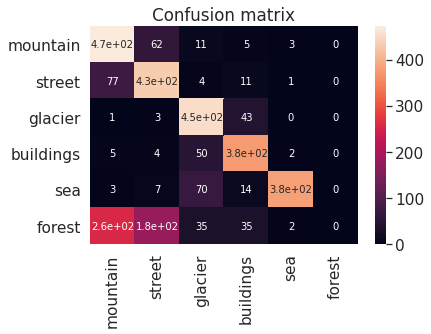

<Figure size 720x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [51]:
CM = confusion_matrix(testing_labels, variant_model_predicted_labels)
ax = plt.axes()
fig = plt.figure(figsize=(10,10))
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels= ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest'], 
           yticklabels= ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest'], ax = ax)
ax.set_title('Confusion matrix')
plt.show()
plt.savefig("ConfusionMatrixForVariant")

**Transfer Learning - VGG16**

In [57]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop

pretrained_model=VGG16(input_shape = (150, 150, 3), 
                        include_top = False, 
                        weights = 'imagenet')

for layer in pretrained_model.layers:
     layer.trainable = False

# pretrained_model.summary()
last_layer = pretrained_model.get_layer('block5_pool')
print('last layer of vgg : output shape: ', last_layer.output_shape)
last_output= last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(6, activation='softmax')(x)          

last layer of vgg : output shape:  (None, 4, 4, 512)


In [58]:
model_vgg = Model(pretrained_model.input, x) 


model_vgg.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])

# model_vgg.fit(x_train,y_train,epochs=1,validation_data=(x_test,y_test))

**Model Fitting**

In [62]:
vgg_History = model_vgg.fit(training_images,training_labels,epochs=10,validation_data=(testing_images,testing_labels))

Epoch 1/10
439/439 [==============================] - 89s 202ms/step - loss: 0.0267 - acc: 0.9986 - val_loss: 1.8054 - val_acc: 0.9023
Epoch 2/10
439/439 [==============================] - 88s 202ms/step - loss: 0.0254 - acc: 0.9988 - val_loss: 1.8073 - val_acc: 0.9090
Epoch 3/10
439/439 [==============================] - 88s 201ms/step - loss: 0.0249 - acc: 0.9989 - val_loss: 2.0191 - val_acc: 0.8990
Epoch 4/10
439/439 [==============================] - 88s 201ms/step - loss: 0.0206 - acc: 0.9987 - val_loss: 1.8105 - val_acc: 0.9053
Epoch 5/10
439/439 [==============================] - 88s 201ms/step - loss: 0.0265 - acc: 0.9987 - val_loss: 1.7674 - val_acc: 0.9067
Epoch 6/10
439/439 [==============================] - 88s 201ms/step - loss: 0.0219 - acc: 0.9986 - val_loss: 1.8843 - val_acc: 0.9060
Epoch 7/10
439/439 [==============================] - 88s 201ms/step - loss: 0.0253 - acc: 0.9988 - val_loss: 1.8938 - val_acc: 0.9050
Epoch 8/10
439/439 [==============================] - 8

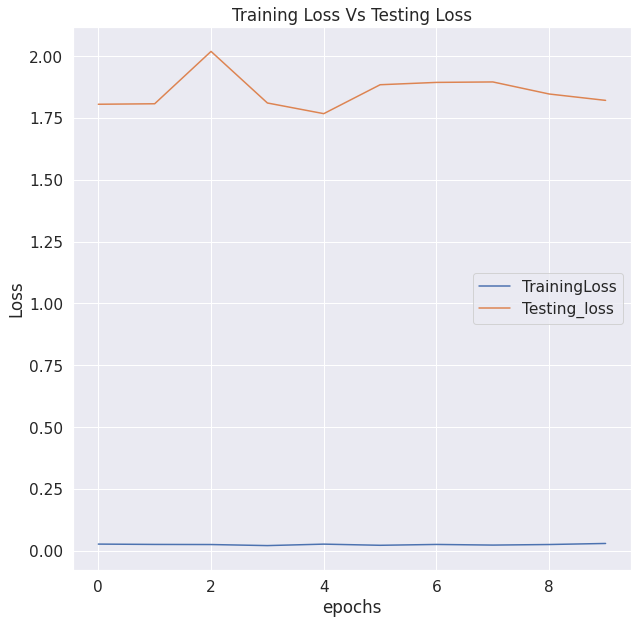

In [64]:
# Plot Loss vs validation loss

#plt.subplot(221)
plt.plot(vgg_History.history['loss'], label = "TrainingLoss")
plt.plot(vgg_History.history['val_loss'], label = "Testing_loss")
plt.title("Training Loss Vs Testing Loss")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend()
plt.savefig("TrainLossVsTestingLossVGG.pdf")

**DENSENET**

In [82]:
#Convolutional block

def __conv_block(ip, nb_filter, bottleneck=False, dropout_rate=None, weight_decay=1e-4):
    
    concat_axis = 1 if K.image_data_format() == 'channels_first' else -1

    x = BatchNormalization(axis=concat_axis, epsilon=1.1e-5)(ip)
    x = Activation('relu')(x)

    if bottleneck:
        inter_channel = nb_filter * 4 

        x = Conv2D(inter_channel, (1, 1), kernel_initializer='he_normal', padding='same', use_bias=False,
                   kernel_regularizer=l2(weight_decay))(x)
        x = BatchNormalization(axis=concat_axis, epsilon=1.1e-5)(x)
        x = Activation('relu')(x)

    x = Conv2D(nb_filter, (3, 3), kernel_initializer='he_normal', padding='same', use_bias=False)(x)
    if dropout_rate:
        x = Dropout(dropout_rate)(x)

    return x

In [83]:
#dense block
def __dense_block(x, nb_layers, nb_filter, growth_rate, bottleneck=False, dropout_rate=None, weight_decay=1e-4,grow_nb_filters=True, return_concat_list=False):
    
    concat_axis = 1 if K.image_data_format() == 'channels_first' else -1

    x_list = [x]

    for i in range(nb_layers):
        cb = __conv_block(x, growth_rate, bottleneck, dropout_rate, weight_decay)
        x_list.append(cb)

        x = concatenate([x, cb], axis=concat_axis)

        if grow_nb_filters:
            nb_filter += growth_rate

    if return_concat_list:
        return x, nb_filter, x_list
    else:
        return x, nb_filter


In [84]:
#Transition Block
def __transition_block(ip, nb_filter, compression=1.0, weight_decay=1e-4):
    ''' Apply BatchNorm, Relu 1x1, Conv2D, optional compression, dropout and Maxpooling2D
    Args:
        ip: keras tensor
        nb_filter: number of filters
        compression: calculated as 1 - reduction. Reduces the number of feature maps
                    in the transition block.
        dropout_rate: dropout rate
        weight_decay: weight decay factor
    Returns: keras tensor, after applying batch_norm, relu-conv, dropout, maxpool
    '''
    concat_axis = 1 if K.image_data_format() == 'channels_first' else -1

    x = BatchNormalization(axis=concat_axis, epsilon=1.1e-5)(ip)
    x = Activation('relu')(x)
    x = Conv2D(int(nb_filter * compression), (1, 1), kernel_initializer='he_normal', padding='same', use_bias=False,
               kernel_regularizer=l2(weight_decay))(x)
    x = AveragePooling2D((2, 2), strides=(2, 2))(x)

    return x



In [85]:
#Up-Conv Blocks
def __transition_up_block(ip, nb_filters, type='deconv', weight_decay=1E-4):
    ''' SubpixelConvolutional Upscaling (factor = 2)
    Args:
        ip: keras tensor
        nb_filters: number of layers
        type: can be 'upsampling', 'subpixel', 'deconv'. Determines type of upsampling performed
        weight_decay: weight decay factor
    Returns: keras tensor, after applying upsampling operation.
    '''

    if type == 'upsampling':
        x = UpSampling2D()(ip)
    elif type == 'subpixel':
        x = Conv2D(nb_filters, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay),
                   use_bias=False, kernel_initializer='he_normal')(ip)
        x = SubPixelUpscaling(scale_factor=2)(x)
        x = Conv2D(nb_filters, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay),
                   use_bias=False, kernel_initializer='he_normal')(x)
    else:
        x = Conv2DTranspose(nb_filters, (3, 3), activation='relu', padding='same', strides=(2, 2),
                            kernel_initializer='he_normal', kernel_regularizer=l2(weight_decay))(ip)

    return x


In [86]:
# Densenet creation
def __create_dense_net(nb_classes, img_input, include_top, depth=40, nb_dense_block=3, growth_rate=12, nb_filter=-1,
                       nb_layers_per_block=-1, bottleneck=False, reduction=0.0, dropout_rate=None, weight_decay=1e-4,
                       subsample_initial_block=False, activation='softmax'):
    
    concat_axis = 1 if K.image_data_format() == 'channels_first' else -1

    if reduction != 0.0:
        assert reduction <= 1.0 and reduction > 0.0, 'reduction value must lie between 0.0 and 1.0'

    # layers in each dense block
    if type(nb_layers_per_block) is list or type(nb_layers_per_block) is tuple:
        nb_layers = list(nb_layers_per_block)  # Convert tuple to list

        assert len(nb_layers) == (nb_dense_block), 'If list, nb_layer is used as provided. ' \
                                                   'Note that list size must be (nb_dense_block)'
        final_nb_layer = nb_layers[-1]
        nb_layers = nb_layers[:-1]
    else:
        if nb_layers_per_block == -1:
            assert (depth - 4) % 3 == 0, 'Depth must be 3 N + 4 if nb_layers_per_block == -1'
            count = int((depth - 4) / 3)

            if bottleneck:
                count = count // 2

            nb_layers = [count for _ in range(nb_dense_block)]
            final_nb_layer = count
        else:
            final_nb_layer = nb_layers_per_block
            nb_layers = [nb_layers_per_block] * nb_dense_block

    # compute initial nb_filter if -1, else accept users initial nb_filter
    if nb_filter <= 0:
        nb_filter = 2 * growth_rate

    # compute compression factor
    compression = 1.0 - reduction

    # Initial convolution
    if subsample_initial_block:
        initial_kernel = (7, 7)
        initial_strides = (2, 2)
    else:
        initial_kernel = (3, 3)
        initial_strides = (1, 1)

    x = Conv2D(nb_filter, initial_kernel, kernel_initializer='he_normal', padding='same',
               strides=initial_strides, use_bias=False, kernel_regularizer=l2(weight_decay))(img_input)

    if subsample_initial_block:
        x = BatchNormalization(axis=concat_axis, epsilon=1.1e-5)(x)
        x = Activation('relu')(x)
        x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Add dense blocks
    for block_idx in range(nb_dense_block - 1):
        x, nb_filter = __dense_block(x, nb_layers[block_idx], nb_filter, growth_rate, bottleneck=bottleneck,
                                     dropout_rate=dropout_rate, weight_decay=weight_decay)
        # add transition_block
        x = __transition_block(x, nb_filter, compression=compression, weight_decay=weight_decay)
        nb_filter = int(nb_filter * compression)

    # The last dense_block does not have a transition_block
    x, nb_filter = __dense_block(x, final_nb_layer, nb_filter, growth_rate, bottleneck=bottleneck,
                                 dropout_rate=dropout_rate, weight_decay=weight_decay)

    x = BatchNormalization(axis=concat_axis, epsilon=1.1e-5)(x)
    x = Activation('relu')(x)
    x = GlobalAveragePooling2D()(x)

    if include_top:
        x = Dense(nb_classes, activation=activation)(x)

    return x

In [87]:
#DenseNet
def DenseNet(input_shape=None, depth=40, nb_dense_block=3, growth_rate=12, nb_filter=-1, nb_layers_per_block=-1,
             bottleneck=False, reduction=0.0, dropout_rate=0.0, weight_decay=1e-4, subsample_initial_block=False,
             include_top=True, weights=None, input_tensor=None,
             classes=10, activation='softmax'):


    if weights not in {'imagenet', None}:
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `cifar10` '
                         '(pre-training on CIFAR-10).')

    if weights == 'imagenet' and include_top and classes != 1000:
        raise ValueError('If using `weights` as ImageNet with `include_top`'
                         ' as true, `classes` should be 1000')

    if activation not in ['softmax', 'sigmoid']:
        raise ValueError('activation must be one of "softmax" or "sigmoid"')

    if activation == 'sigmoid' and classes != 1:
        raise ValueError('sigmoid activation can only be used when classes = 1')

    # Determine proper input shape
    input_shape = _obtain_input_shape(input_shape,
                                      default_size=32,
                                      min_size=8,
                                      data_format=K.image_data_format(),
                                      require_flatten=include_top)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    x = __create_dense_net(classes, img_input, include_top, depth, nb_dense_block,
                           growth_rate, nb_filter, nb_layers_per_block, bottleneck, reduction,
                           dropout_rate, weight_decay, subsample_initial_block, activation)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
    # Create model.
    model = Model(inputs, x, name='densenet')


    return model

In [88]:
from keras import backend as K
def Implement_focal_loss(gamma=2., alpha=.25):
    
    def focal_loss(y_true, y_pred):
        # Scale predictions so that the class probas of each sample sum to 1
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)

        # Clip the prediction value to prevent NaN's and Inf's
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        # Calculate Cross Entropy
        cross_entropy = -y_true * K.log(y_pred)

        # Calculate Focal Loss
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy

        # Sum the losses in mini_batch
        return K.sum(loss, axis=1)

    return focal_loss

In [89]:
denseNetModel = DenseNet((150, 150, 3), depth=64, nb_dense_block=3,growth_rate=4, bottleneck=True, reduction=0.5, weights=None, classes=6)

In [91]:
optimizer = Adam(lr=0.0001, decay=1e-5)
denseNetModel.compile(loss=[Implement_focal_loss(alpha=.25, gamma=2)], metrics=["accuracy"], optimizer=optimizer)

In [92]:
denseNetModel.summary()

Model: "densenet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 150, 150, 8)  216         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 150, 150, 8)  32          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 150, 150, 8)  0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

In [95]:
DenseNetHistory = denseNetModel.fit(training_images, training_labels, epochs=20, shuffle=True, validation_split=0.3)

Train on 9830 samples, validate on 4214 samples
Epoch 1/20
9830/9830 [==============================] - 568s 58ms/step - loss: 3.0648 - accuracy: 0.0598 - val_loss: 8.6689 - val_accuracy: 0.1445
Epoch 2/20
9830/9830 [==============================] - 547s 56ms/step - loss: 2.9920 - accuracy: 0.1502 - val_loss: 8.6251 - val_accuracy: 0.1901
Epoch 3/20
9830/9830 [==============================] - 547s 56ms/step - loss: 2.9876 - accuracy: 0.1502 - val_loss: 8.6074 - val_accuracy: 0.1137
Epoch 4/20
9830/9830 [==============================] - 547s 56ms/step - loss: 2.9836 - accuracy: 0.1600 - val_loss: 8.5919 - val_accuracy: 0.1664
Epoch 5/20
9830/9830 [==============================] - 546s 56ms/step - loss: 2.9795 - accuracy: 0.1576 - val_loss: 8.5796 - val_accuracy: 0.1768
Epoch 6/20
9830/9830 [==============================] - 547s 56ms/step - loss: 2.9752 - accuracy: 0.1587 - val_loss: 8.5717 - val_accuracy: 0.2311
Epoch 7/20
9830/9830 [==============================] - 547s 56ms/step

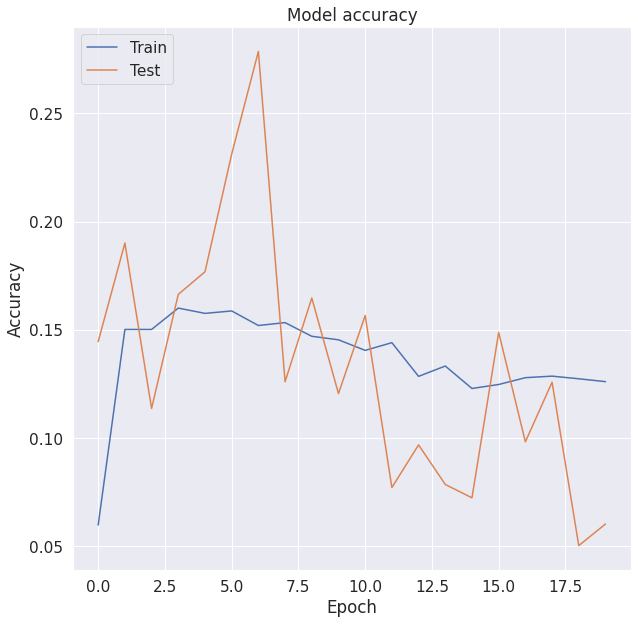

<Figure size 432x288 with 0 Axes>

In [98]:
fig = plot.figure(figsize=(10,10))
plot.plot(DenseNetHistory.history['accuracy'])
plot.plot(DenseNetHistory.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()
plot.savefig("AccuracyVsValAccuFL.pdf")

**Pretrained Resnet**

In [12]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

pretrained_model=ResNet50( input_shape=(150,150,3),  #setting up the dimension as per our dataset
                                  include_top=False,
                                  weights='imagenet'  #using imagenet weights
                                   )
# Setting the training false
for layer in pretrained_model.layers:
     layer.trainable = False

        
#step3        
last_layer = pretrained_model.get_layer('conv5_block3_out')
print('last layer of vgg : output shape: ', last_layer.output_shape)
last_output = last_layer.output

94773248/94765736 [==============================] - 1s 0us/step
last layer of vgg : output shape:  (None, 5, 5, 2048)


In [15]:
#step4
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(6, activation='softmax')(x)

#step5
resnet_model = Model(pretrained_model.input, x) 

#step6
resnet_model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])

In [17]:
resnet_history = resnet_model.fit(training_images,training_labels,epochs=20,validation_data=(testing_images,testing_labels))

Epoch 1/20
439/439 [==============================] - 22s 51ms/step - loss: 0.3265 - acc: 0.9280 - val_loss: 0.5593 - val_acc: 0.8903
Epoch 2/20
439/439 [==============================] - 22s 51ms/step - loss: 0.2295 - acc: 0.9521 - val_loss: 0.5758 - val_acc: 0.9027
Epoch 3/20
439/439 [==============================] - 22s 51ms/step - loss: 0.1462 - acc: 0.9692 - val_loss: 0.7768 - val_acc: 0.9030
Epoch 4/20
439/439 [==============================] - 22s 51ms/step - loss: 0.1162 - acc: 0.9774 - val_loss: 0.7965 - val_acc: 0.9080
Epoch 5/20
439/439 [==============================] - 22s 51ms/step - loss: 0.0792 - acc: 0.9843 - val_loss: 0.9674 - val_acc: 0.9153
Epoch 6/20
439/439 [==============================] - 22s 51ms/step - loss: 0.0739 - acc: 0.9858 - val_loss: 1.1758 - val_acc: 0.9123
Epoch 7/20
439/439 [==============================] - 22s 51ms/step - loss: 0.0613 - acc: 0.9886 - val_loss: 1.1521 - val_acc: 0.9097
Epoch 8/20
439/439 [==============================] - 22s 51ms

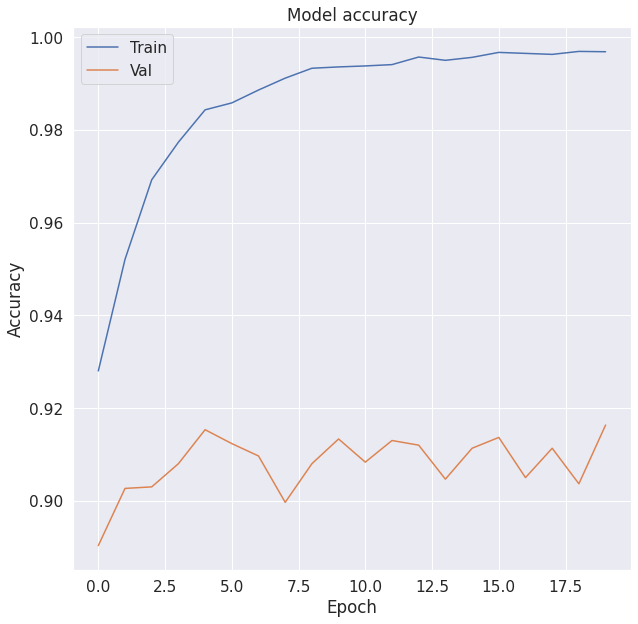

<Figure size 432x288 with 0 Axes>

In [39]:
fig = plot.figure(figsize=(10,10))
plot.plot(resnet_history.history['acc'])
plot.plot(resnet_history.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Val'], loc='upper left')
plot.show()
plot.savefig("AccuracyVsValAccuResnet.pdf")

**InceptionV3**

In [20]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop


pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = "imagenet")

for layer in pre_trained_model.layers:
     layer.trainable = False
        
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

87916544/87910968 [==============================] - 1s 0us/step
last layer output shape:  (None, 7, 7, 768)


In [21]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(6, activation='softmax')(x)           

incept_model = Model(pre_trained_model.input, x) 

incept_model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])

In [22]:
incept_history=incept_model.fit(training_images,training_labels,epochs=20,validation_data=(testing_images,testing_labels))

Epoch 1/20
439/439 [==============================] - 17s 39ms/step - loss: 10.9373 - acc: 0.4578 - val_loss: 1.6690 - val_acc: 0.5230
Epoch 2/20
439/439 [==============================] - 16s 36ms/step - loss: 1.3676 - acc: 0.5414 - val_loss: 1.1864 - val_acc: 0.5850
Epoch 3/20
439/439 [==============================] - 16s 36ms/step - loss: 1.2136 - acc: 0.5862 - val_loss: 2.1260 - val_acc: 0.5267
Epoch 4/20
439/439 [==============================] - 16s 36ms/step - loss: 1.1429 - acc: 0.6102 - val_loss: 1.1940 - val_acc: 0.6237
Epoch 5/20
439/439 [==============================] - 16s 36ms/step - loss: 1.0333 - acc: 0.6396 - val_loss: 1.1618 - val_acc: 0.6233
Epoch 6/20
439/439 [==============================] - 16s 36ms/step - loss: 1.0112 - acc: 0.6550 - val_loss: 1.2523 - val_acc: 0.5990
Epoch 7/20
439/439 [==============================] - 16s 36ms/step - loss: 0.9737 - acc: 0.6685 - val_loss: 1.3912 - val_acc: 0.6237
Epoch 8/20
439/439 [==============================] - 16s 36m

In [23]:
incept_model_loss = incept_model.evaluate(testing_images, testing_labels)

94/94 [==============================] - 2s 24ms/step - loss: 1.8091 - acc: 0.6890


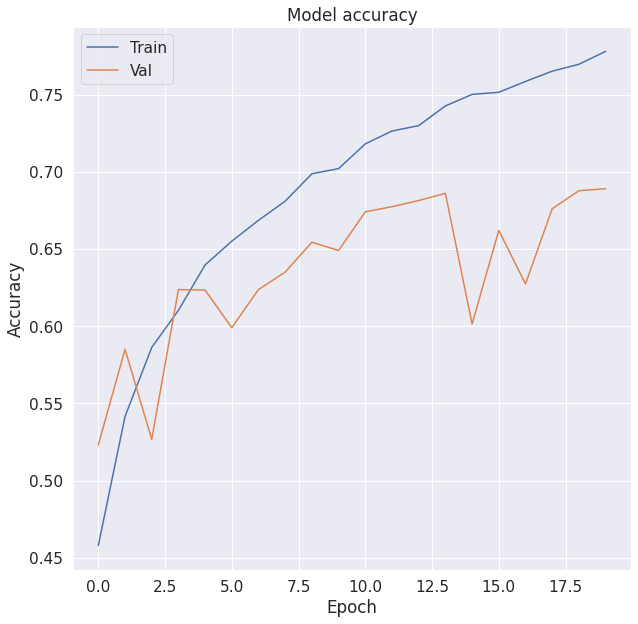

<Figure size 432x288 with 0 Axes>

In [40]:
fig = plot.figure(figsize=(10,10))
plot.plot(incept_history.history['acc'])
plot.plot(incept_history.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Val'], loc='upper left')
plot.show()
plot.savefig("AccuracyVsValAccuInception.pdf")